In [1]:
#Se carga Módulo de Vector Field Plot
import vectorfieldplot.vfp as vfp
#Se carga función para visualizar el archivo en formato svg
from IPython.display import SVG
#Se cargan funciones para la interactividad
from ipywidgets import interactive
from IPython.display import display

# Dipolo Eléctrico Ideal

El campo eléctrico que las cargas puntuales $q_{1}$ y $q_{2}$ ubicadas en la posiciones $\vec{r}_{1}$ y $\vec{r}_{2}$ respectivamente, generan en la posición $\vec{r}$ está dado por:

$$\vec{E}(\vec{r}) = \frac{k_{e} q_{1}}{||\vec{r}-\vec{r}_{1}||^3} (\vec{r}-\vec{r}_{1})+\frac{k_{e} q_{2}}{||\vec{r}-\vec{r}_{2}||^3} (\vec{r}-\vec{r}_{2}),$$

donde $k_{e}$ es la constante eléctrica cuyo valor en el SI es $k_{e} \approx 8.99\times 10^{9}~\text{Nm}^2\text{C}^{-2}.$

Si las cargas tienen la misma magnitud pero son de signos contrarios y están a una distancia $d$ del centro del dipolo, se puede demostrar que lejos ($r=||\vec{r}||>>d$) del dipolo el campo eléctrico está dado por
$$\vec{E}_{dip}(\vec{r}) = k_{e} \left( \frac{3(\vec{p} \cdot \vec{r}) \vec{r} -r^2 \vec{p}}{r^5} \right)=k_{e} \left( \frac{3(\vec{p} \cdot \hat{r}) \hat{r} - \vec{p}}{r^3} \right),$$

donde:
* $\vec{p}$ se conoce como el "Momento dipolar Eléctrico". Es un vector cuya magnitud es $||\vec{p}||=2qd$ y apunta desde la carga negativa a la positiva.
* $r$ es la distancia desde el centro del dipolo al punto donde se evalúa el campo eléctrico.
* $\hat{r}$ es un vector unitario que apunta desde el centro del dipo al punto donde se evalúa el campo eléctrico y satisface que:
    $$\vec{r} = r\,\hat{r}.$$

### 1. Se crea el archivo y se configura el campo

In [2]:
#Si quiere rehacer la imagen debe volver a ejecutar desde esta celda en adelante
doc = 1
del doc
#Se crea documento donde se dibujará las líneas de campo eléctrico
name = 'dipolo_electrico_ideal'
doc = vfp.FieldplotDocument(name, commons=True,center=[300,300],width=600,height=600)
#Se configura el campo eléctrico
field = vfp.Field([['dipole', {'x':0, 'y':0, 'px':4, 'py':0}]])
#Se dibujan las cargas que generan el campo
doc.draw_charges(field)

### 2. Se itera para dibujar cada una de las líneas de campo

In [3]:
#Se configura el número de líneas de campo Eléctrico
n = 10
#Se itera para dibujar las líneas de campo eléctrico
for i in range(n):
    a = 2.0 * vfp.pi * (0.5 + i) / n
    line = vfp.FieldLine(field, [vfp.cos(a), vfp.sin(a)], maxr=1000, directions='both', pass_dipoles=0)
    doc.draw_line(line, arrows_style={'dist': 1.4, 'min_arrows':1, 'max_arrows':2})

('closed at', ' -0.00000,  0.00000')
('closed at', ' -0.00000,  0.00000')
('closed at', ' -0.00000,  0.00000')
('closed at', ' -0.00000,  0.00000')
('closed at', ' -0.00000,  0.00000')
('closed at', ' -0.00000, -0.00000')
('closed at', ' -0.00000, -0.00000')
('closed at', ' -0.00000, -0.00000')
('closed at', ' -0.00000, -0.00000')
('closed at', ' -0.00000, -0.00000')


### 3. Se exporta el archivo en formato svg

In [4]:
#Se guarda archivo en formato svg
doc.write()

('image written to', 'dipolo_electrico_ideal.svg')


In [5]:
# Verifique que se ha exportado el archivo name+'.svg'
%ls

animacion_dipolo_electrico_ideal.svg  dipolo_electrico.svg  monopolo.ipynb
animacion_dipolo_electrico.svg        dipolo-ideal.ipynb
dipolo_electrico_ideal.svg            dipolo.ipynb


### 4. Se carga y visualiza el archivo en formato svg

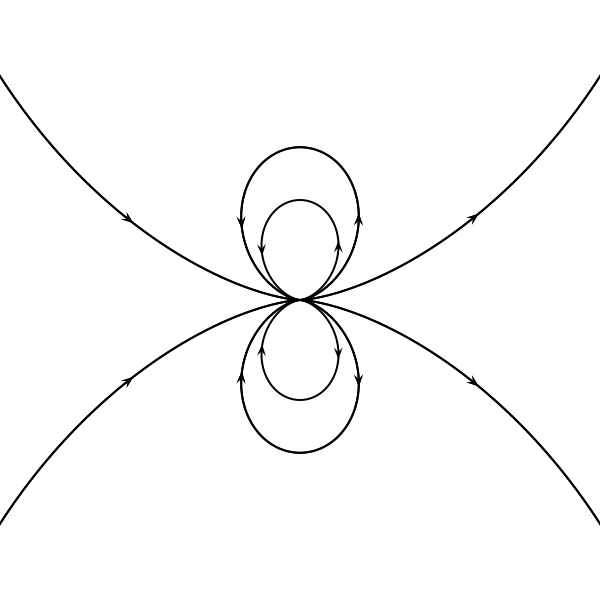

In [6]:
#Se visualiza el archivo
display(SVG(filename=name+'.svg'))

# Animación Interactiva

In [7]:
name = 'animacion_dipolo_electrico_ideal'
def no_interactive(x0=0, y0=0, px=1, py=0, n=0):
    doc = 1
    del doc
    #Se genera el arhivo en el que se trabajará
    doc = vfp.FieldplotDocument(name, commons=True,center=[300,300],width=700,height=600,unit=100)
    #Se configura el campo eléctrico
    field = vfp.Field([['dipole', {'x':x0, 'y':y0, 'px':px, 'py':py}]])
    #Se dibujan las cargas que generan el campo eléctrico
    doc.draw_charges(field) 
    #Se itera para dibujar cada una de las líneas de campo
    for i in range(n):
        a = 2.0 * vfp.pi * (0.5 + i) / n
        line = vfp.FieldLine(field, [vfp.cos(a), vfp.sin(a)], maxr=1000, directions='both', pass_dipoles=0)
        doc.draw_line(line, arrows_style={'dist': 1.4, 'min_arrows':1, 'max_arrows':2})
    #Se guarda el archivo en formato svg
    doc.write()
    #Se visualiza el archivo
    display(SVG(filename=name+'.svg'))

(1000, 'integration steps exceeded at', '-1000.12361,  0.00000')
(1000, 'integration steps exceeded at', ' 998.12361, -0.00000')
('image written to', 'animacion_dipolo_electrico_ideal.svg')


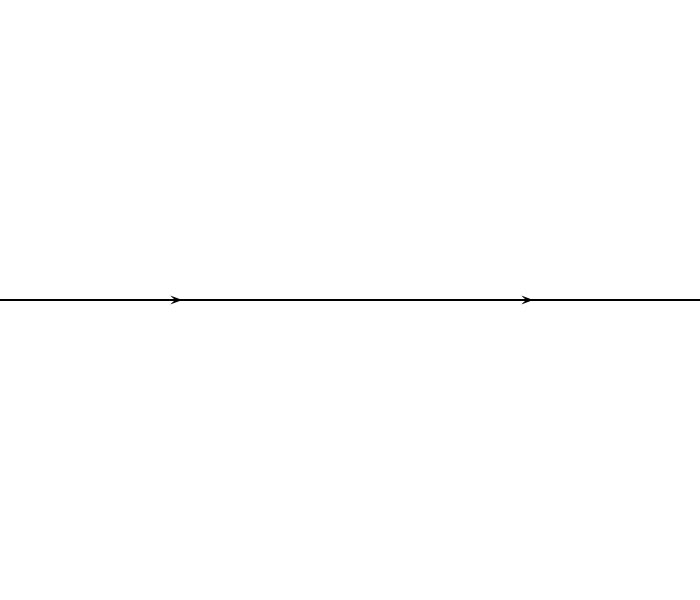

In [8]:
display(interactive(no_interactive,
                    x0 = (-10,10,0.5), y0 = (-10,10,0.5),
                    px = (-10,10,0.5), py = (-10,10,0.5), n = (1,40,1)))